
* *Amina Ahmad      (NIM-BSCS-2021-27)*


# **Built In**

Step 1: Set Up the Environment

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless
!pip install scikit-image


Step 2: Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


Step 3: Upload and Read the Image

In [ ]:
from google.colab import files
from skimage import io

# Upload an image
uploaded = files.upload()

# Read the image
image_path = list(uploaded.keys())[0]
image = io.imread(image_path)


Saving _ (10).jpeg to _ (10).jpeg


Step 4: Convert the Image to Grayscale

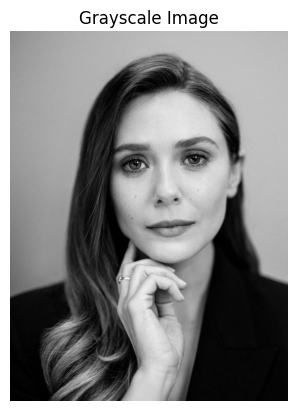

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


Step 5: Compute the Local Binary Pattern

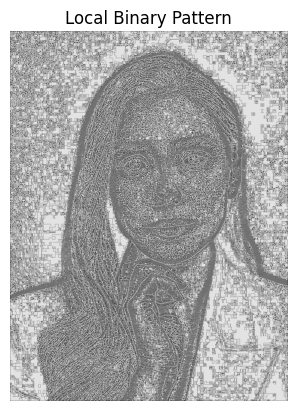

In [ ]:
# Set parameters for LBP
radius = 1  # Radius of circle
n_points = 8 * radius  # Number of points to consider

# Compute LBP
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Display the LBP image
plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern')
plt.axis('off')
plt.show()


Step 6: Compute and Plot the Histogram of LBP

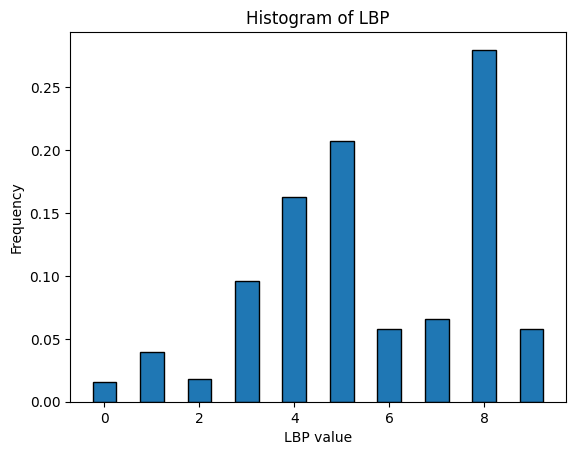

In [ ]:
# Compute the histogram
n_bins = int(lbp.max() + 1)
hist, bins = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

# Plot the histogram
plt.bar(bins[:-1], hist, width=0.5, edgecolor='black')
plt.title('Histogram of LBP')
plt.xlabel('LBP value')
plt.ylabel('Frequency')
plt.show()


Step 7: Highlight LBP Patterns on the Original Image

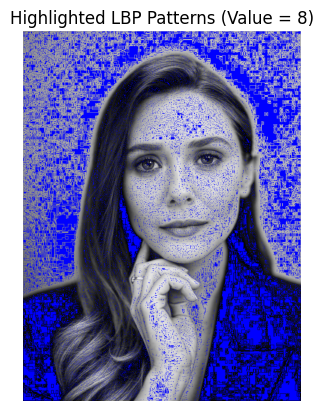

In [ ]:
# Create a mask for LBP value 2
mask = lbp == 8

# Create a copy of the original image to overlay the mask
highlighted_image = image.copy()
highlighted_image[mask] = [255, 0, 0]  # Highlight with red color

# Display the highlighted image
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted LBP Patterns (Value = 8)')
plt.axis('off')
plt.show()


# **Customized Algorithm**

Step 1: Set Up the Environment

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless
!pip install matplotlib


Step 2: Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Step 3: Upload and Read the Image

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Read the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)


Saving _ (10).jpeg to _ (10) (1).jpeg


Step 4: Convert the Image to Grayscale

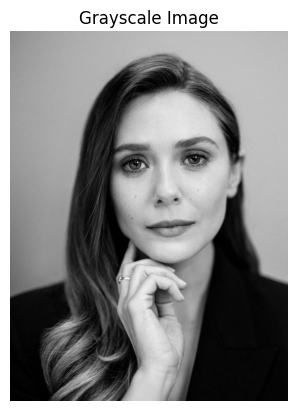

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


Step 5: Implement the Custom LBP Function

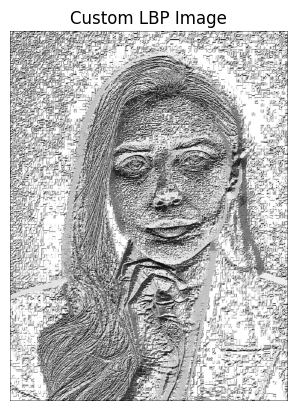

In [ ]:
def custom_lbp(image):
    # Get dimensions of the image
    rows, cols = image.shape
    # Initialize the LBP image
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    # Iterate over each pixel (excluding the border pixels)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            center = image[i, j]
            binary_string = ''
            # Compare with the 8 neighbors
            binary_string += '1' if image[i-1, j-1] >= center else '0'  # Top-left
            binary_string += '1' if image[i-1, j] >= center else '0'    # Top
            binary_string += '1' if image[i-1, j+1] >= center else '0'  # Top-right
            binary_string += '1' if image[i, j+1] >= center else '0'    # Right
            binary_string += '1' if image[i+1, j+1] >= center else '0'  # Bottom-right
            binary_string += '1' if image[i+1, j] >= center else '0'    # Bottom
            binary_string += '1' if image[i+1, j-1] >= center else '0'  # Bottom-left
            binary_string += '1' if image[i, j-1] >= center else '0'    # Left

            # Convert binary string to decimal
            lbp_value = int(binary_string, 2)
            lbp_image[i, j] = lbp_value

    return lbp_image

# Compute the LBP image
lbp_image = custom_lbp(gray_image)

# Display the LBP image
plt.imshow(lbp_image, cmap='gray')
plt.title('Custom LBP Image')
plt.axis('off')
plt.show()


Step 6: Compute and Plot the Histogram of LBP

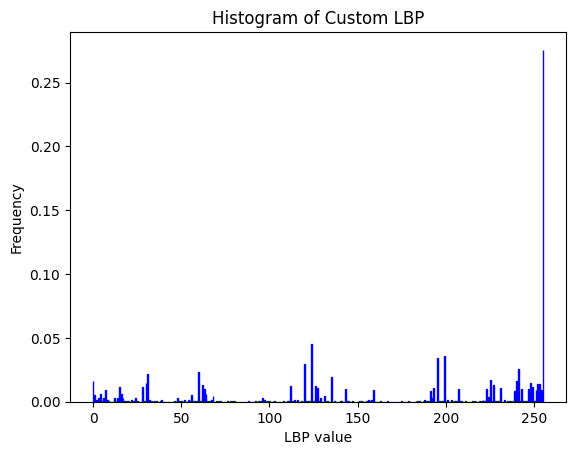

In [ ]:
# Compute the histogram
hist, bins = np.histogram(lbp_image.ravel(), bins=256, range=(0, 256), density=True)

# Plot the histogram
plt.bar(bins[:-1], hist, width=0.5, edgecolor='blue')
plt.title('Histogram of Custom LBP')
plt.xlabel('LBP value')
plt.ylabel('Frequency')
plt.show()


Step 7: Highlight Specific LBP Patterns on the Original Image

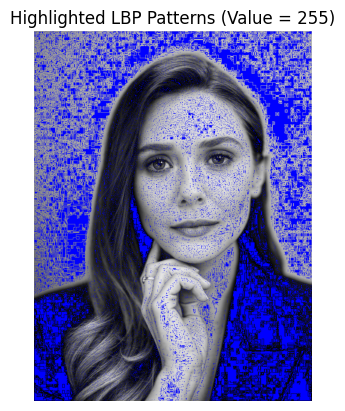

In [ ]:
# Create a mask for LBP value 2
mask = lbp_image == 255

# Create a copy of the original image to overlay the mask
highlighted_image = image.copy()
highlighted_image[mask] = [255, 0, 0]  # Highlight with red color

# Display the highlighted image
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted LBP Patterns (Value = 255)')
plt.axis('off')
plt.show()
